#### Check TTL pulses in ephys clock

**Configure session to analyze**

In [20]:
# # TTL signal missing
# animal_ID='FNT099'
# session_folder = 'W:/projects/FlexiVexi/behavioural_data/FNT099/2024-05-12T10-46-59/Open-Ephys/99_2024-05-12_11-46-29'

# Both events and heartbeat signal exist
animal_ID='FNT098'
session_folder = 'W:/projects/FlexiVexi/behavioural_data/FNT098/2024-04-08T14-25-33/Open-Ephys/98_2024-04-08_15-25-18'
session_output_folder = ''

**Import continuous.dat from stream 'NI-DAQmx-103.PXIe-6341'**

In [21]:
from open_ephys.analysis import Session
import pandas as pd

session = Session(session_folder)
recording = session.recordnodes[0].recordings[0]

# Get pandas data frame of continuous.dat on stream 'NI-DAQmx-103.PXIe-6341'
continuous_data = recording.continuous[1].get_samples(start_sample_index=0, end_sample_index=40000)
continuous_data = pd.DataFrame(continuous_data)
continuous_data

,0,1,2,3,4,5,6,7
0,5.092318,5.108188,5.091403,5.114292,5.071871,5.107273,5.089572,5.112461
1,5.092624,5.108493,5.091098,5.115207,5.071871,5.107273,5.089877,5.112766
2,5.092318,5.108188,5.090793,5.115207,5.071566,5.107273,5.089572,5.112766
3,5.092013,5.108798,5.091403,5.114902,5.071871,5.107578,5.090793,5.112461
4,5.092013,5.108188,5.090793,5.114292,5.071871,5.107883,5.089572,5.112766
...,...,...,...,...,...,...,...,...
39995,5.130772,5.146947,5.129856,5.153356,5.110630,5.146336,5.128941,5.151219
39996,5.130772,5.147557,5.129856,5.153050,5.110630,5.146336,5.128330,5.150914
39997,5.130772,5.146947,5.130161,5.153356,5.110935,5.146336,5.128330,5.151219
39998,5.130467,5.147252,5.130161,5.153966,5.110019,5.146031,5.128330,5.151219


**Plot continuous.dat on channel 3 (TTL  pulse channel)**

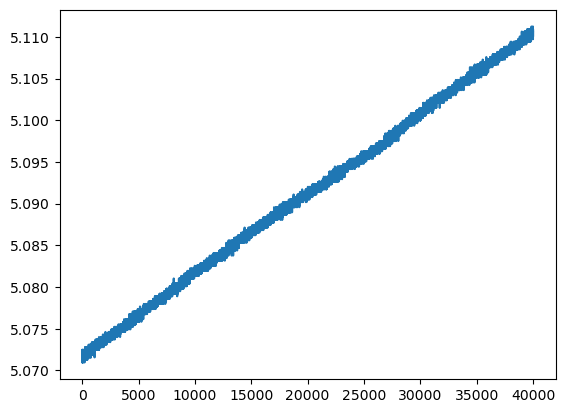

In [22]:
import matplotlib.pyplot as plt

TTL_idx = 4
TTL_data = continuous_data.iloc[:, TTL_idx]
TTL_data

# Plot TTL data
plt.plot(TTL_data)

In [19]:
# check whether events exist on line 4
events = recording.events

# get unique elements of stream_name
data_streams = list(set(events['stream_name']))

print(len(data_streams))
print(data_streams)


['ProbeA', 'PXIe-6341']


In [23]:
# check whether sync line can be added


# Sync line corresponding to heartbeat signal of ephys clock (1 pulse per second of duration 0.5 seconds). 
# Use this as the master clock (set main = True).
recording.add_sync_line(1,                          # 'Heartbeat' signal line number
                        100,                        # processor ID
                        'ProbeA',                   # stream name
                        main=True)                  # use as the main stream


# Sync line corresponding to TTL pulses
recording.add_sync_line(4,                          # TTL line number
                        103,                        # processor ID
                        'PXIe-6341',                # stream name
                        main=False)                 # synchronize to main stream

In [25]:
recording.compute_global_timestamps(overwrite=False)

Processor ID: 100, Stream Name: ProbeA, Line: 1 (main sync line))
  First event sample number: 111557
  Last event sample number: 97689097
  Total sync events: 3261
  Sample rate: 30000.0
Processor ID: 103, Stream Name: PXIe-6341, Line: 1 (aux sync line))
  First event sample number: 410439
  Last event sample number: 129483523
  Total sync events: 834
  Scale factor: 0.752926868148036
  Actual sample rate: 39844.507174767976


In [27]:
event_df = recording.events
event_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state,global_timestamp
0,1,157022,3.500025,103,1,PXIe-6341,1,-2.641582
1,1,111557,3.500029,100,0,ProbeA,1,3.718567
2,1,126557,4.000029,100,0,ProbeA,0,4.218567
3,1,177023,4.000050,103,1,PXIe-6341,0,-2.139606
4,1,197023,4.500050,103,1,PXIe-6341,1,-1.637655
...,...,...,...,...,...,...,...,...
14705,1,130518257,3262.530900,103,1,PXIe-6341,1,3269.107631
14706,1,97897211,3263.030722,100,0,ProbeA,0,3263.240367
14707,1,130538257,3263.030900,103,1,PXIe-6341,0,3269.609582
14708,1,97912211,3263.530724,100,0,ProbeA,1,3263.740367


In [34]:
TTL_pulses = event_df[(event_df['stream_name'] == 'PXIe-6341') & (event_df['line'] == 4)]
TTL_pulses = TTL_pulses.reset_index(drop=True)
TTL_pulses

# save the TTL pulses to a csv file
output_folder = session_output_folder
TTL_pulses.to_csv('TTL_pulses.csv', index=False)

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state,global_timestamp
0,4,410439,9.835450,103,1,PXIe-6341,1,3.718567
1,4,410839,9.845450,103,1,PXIe-6341,0,3.728606
2,4,531678,12.866425,103,1,PXIe-6341,1,6.761370
3,4,532078,12.876425,103,1,PXIe-6341,0,6.771409
4,4,543718,13.167425,103,1,PXIe-6341,1,7.063545
...,...,...,...,...,...,...,...,...
1663,4,129272853,3231.395800,103,1,PXIe-6341,0,3237.851027
1664,4,130292081,3256.876500,103,1,PXIe-6341,1,3263.431165
1665,4,130292481,3256.886500,103,1,PXIe-6341,0,3263.441204
1666,4,130304401,3257.184500,103,1,PXIe-6341,1,3263.740367
